<a href="https://colab.research.google.com/github/alam2018/ml_prediction_m1/blob/master/lstm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Define if the simulation is for uRLLC or eMBB slice
eMBB = False

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Importing the training set
if eMBB == True:
  dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_eMBB/train_data/traffic_simulation.csv', sep=';')
else:
  dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_URLLC/traffic_simulation.csv', sep=';')
    
#Insert a new column containing the 'byte' value converted to 'Mb' for training
dataset_train['TotalData_Mb'] = dataset_train.iloc[:, 2].values / 1000000

#training_set = dataset_train.iloc[:, 1:2].values
training_set = dataset_train.iloc[:, 4].values
training_set = training_set.reshape(-1,1)

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 6000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import adam, SGD, RMSprop, Nadam

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
#regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
#regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
#regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.5))


# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.5))


# Adding the output layer
regressor.add(Dense(units = 1))
#regressor.add(Activation('softmax'))

# Compiling the RNN
#opt = SGD(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
#opt= SGD(lr=0.01, momentum=0.01, decay=0.01, nesterov=False)
#opt= Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#opt = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)
opt = adam
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [0]:
# Fitting the RNN to the Training set
model_data = regressor.fit(X_train, y_train, validation_split = 0.30, epochs = 100, batch_size = 32,  verbose=1)


Train on 4158 samples, validate on 1782 samples
Epoch 1/100
4158/4158 [==============================] - 90s 22ms/step - loss: 0.0029 - acc: 2.4050e-04 - val_loss: 5.9242e-05 - val_acc: 0.0000e+00
Epoch 2/100
4158/4158 [==============================] - 86s 21ms/step - loss: 9.0949e-04 - acc: 2.4050e-04 - val_loss: 7.7244e-05 - val_acc: 0.0000e+00
Epoch 3/100
4158/4158 [==============================] - 86s 21ms/step - loss: 7.9124e-04 - acc: 2.4050e-04 - val_loss: 9.7102e-05 - val_acc: 0.0000e+00
Epoch 4/100
4158/4158 [==============================] - 85s 20ms/step - loss: 7.0499e-04 - acc: 2.4050e-04 - val_loss: 1.5145e-04 - val_acc: 0.0000e+00
Epoch 5/100
4158/4158 [==============================] - 84s 20ms/step - loss: 5.7732e-04 - acc: 2.4050e-04 - val_loss: 8.6589e-05 - val_acc: 0.0000e+00
Epoch 6/100
4158/4158 [==============================] - 83s 20ms/step - loss: 5.1976e-04 - acc: 2.4050e-04 - val_loss: 6.9620e-05 - val_acc: 0.0000e+00
Epoch 7/100
4158/4158 [===============

In [0]:
# list all data in history
#print(model_data.history.keys())

# summarize history for accuracy
#plt.plot(model_data.history['mean_squared_error'])
#plt.plot(model_data.history['val_mean_squared_error'])
#plt.plot(model_data.history['acc'])
#plt.plot(model_data.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper right')
#plt.savefig('model_accuracy.png',bbox_inches="tight", pad_inches=0, dpi=300)
#plt.show()



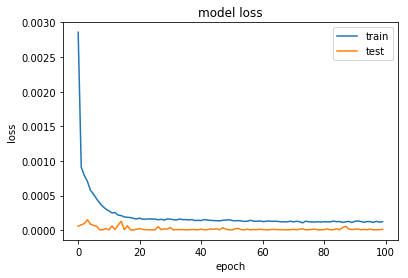

In [0]:
# summarize history for loss
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model_loss_data.png',bbox_inches="tight", pad_inches=0, dpi=300)
plt.show()

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017

if eMBB == True:
  dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_eMBB/train_data/traffic_simulation.csv', sep=';')
else:
  dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/traffic_prediction/data_URLLC/traffic_simulation_testData.csv', sep=';')

#Insert a new column containing the 'byte' value converted to 'Mb' for testing
#dataset_test['TotalData_Mb'] = dataset_test.iloc[:, 2].values / 1000000
dataset_test['TotalData_Mb'] = dataset_test.iloc[:, 2].values / 1000000
#real_stock_price = dataset_test.iloc[60:90, 1:2].values
real_stock_price = dataset_test.iloc[1775:1835, 4].values

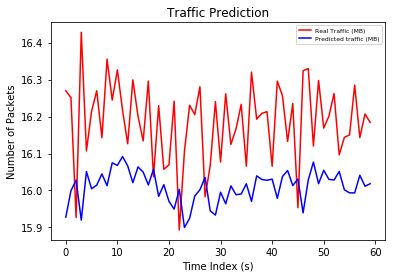

In [0]:
# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#inputs = dataset_test.iloc[:, 1:2].values
inputs = dataset_test.iloc[:, 4].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
inputs_size = len(inputs)
for i in range(1775, 1835):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#X_test = np.reshape(X_test, -1)

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Traffic (MB)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted traffic (MB)')
#plt.ylim (15,17)
plt.title('Traffic Prediction')
plt.xlabel('Time Index (s)')
plt.ylabel('Number of Packets')
plt.legend(loc='best', prop={'size': 6})

plt.savefig('lstm_testData_data.png',bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()



In [0]:
#Generating output for validation dataset
# Creating a data structure with 60 timesteps and 1 output

#real_valid_data = dataset_test.iloc[1201:1231, 1:2].values

real_valid_data = dataset_train.iloc[6000:6060, 4].values

X_valid = []
for i in range(3000,3060):
    X_valid.append(training_set_scaled[i-60:i, 0])

X_valid = np.array(X_valid)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

predicted_packet_valid = regressor.predict(X_valid)
predicted_packet_valid = sc.inverse_transform(predicted_packet_valid)



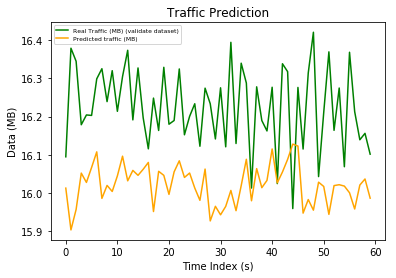

In [0]:
# Visualising the validation data
from google.colab import files
test = plt.figure()

plt.plot(real_valid_data, color = 'green', label = 'Real Traffic (MB) (validate dataset)')
plt.plot(predicted_packet_valid, color = 'orange', label = 'Predicted traffic (MB)')
#plt.ylim (15,17)
plt.title('Traffic Prediction')
plt.xlabel('Time Index (s)')
plt.ylabel('Data (MB)')
plt.legend(loc='best', prop={'size': 6})

#plt.draw()
#fig = plt.figure(figsize=(9, 11))
plt.savefig('lstm_valData_data.png',bbox_inches="tight", pad_inches=0, dpi=300)
plt.show()
#files.download('test.pdf')

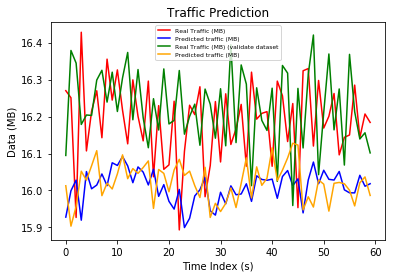

In [0]:
# Visualising the combination

plt.plot(real_stock_price, color = 'red', label = 'Real Traffic (MB)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted traffic (MB)')
plt.plot(real_valid_data, color = 'green', label = 'Real Traffic (MB) (validate dataset')
plt.plot(predicted_packet_valid, color = 'orange', label = 'Predicted traffic (MB)')
plt.title('Traffic Prediction')
plt.xlabel('Time Index (s)')
plt.ylabel('Data (MB)')
plt.legend(loc='best', prop={'size': 6})

#plt.draw()
#fig = plt.figure(figsize=(9, 11))
plt.savefig('lstm_comb_data.png',bbox_inches="tight", pad_inches=0, dpi=300)
plt.show()
#files.download('test.pdf')

In [0]:
from sklearn.metrics import mean_squared_error

from math import sqrt

mse = mean_squared_error(real_stock_price, predicted_stock_price)

rmse_test = sqrt(mse)

print('RMSE test data: %f' % rmse_test)

mse = mean_squared_error(real_valid_data, predicted_packet_valid)

rmse_val = sqrt(mse)

print('RMSE val data: %f' % rmse_val)


RMSE test data: 0.214997
RMSE val data: 0.233670


In [0]:
#Write the test and predicted data
predicted_stock_price = np.reshape (predicted_stock_price, (np.product(predicted_stock_price.shape),))

df = pd.DataFrame(list(zip(real_stock_price, predicted_stock_price)),
              columns=['Test Data (Mb)','Predicted Data (Mb)'])

df.to_csv("lstm_data_test.csv", index = None, header=True)

#write the validation and predicted data
predicted_packet_valid = np.reshape (predicted_packet_valid, (np.product(predicted_packet_valid.shape),))

write_val = pd.DataFrame(list(zip(real_valid_data, predicted_packet_valid)),
              columns=['Validation Data (Mb)','Predicted Data (Mb)'])
write_val.to_csv("lstm_data_val.csv", index = None, header=True)

In [0]:
#model_data.history = np.reshape (model_data.history, (np.product(model_data.history.shape),))

#write_model = pd.DataFrame (model_data.history, index = None)

#print (model_data.data)